In [1]:
##################################################################################################
#       ENV717 - S2022                                                                           #                            
#       This script explores the PLANTS in eGRIUD and                                            #
#       finds the power supply curve from ERCOT's baseload generators                            #
##################################################################################################
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### INCLUDES SEVERAL STEPS THAT ARE NOT NECESSARY TO GENERATE THE SUPPLY CURVE BUT HELP US KNOW ERCOT BETTER
### BY EXPLORING EGRID WITH pandas DataFrames

##################################################################################################################
## 1. Read eGRID19 file                                                                                          #
##         Read the PLNT19 sheet of the excel file into a pandas DataFrame.                                      #
##         A DataFrame is a two-dimensional labeled data structure with columns of potentially different types   #
##         Specify that the headers are on the second row of the excel file (i.e., row 1 in Python)              #
## 2. Confirm we read all columns by printing the first five rows                                                #
###################################################################################################################
egrid=pd.read_excel("egrid2019_data.xlsx",sheet_name="PLNT19",keep_default_na=False,header=1) #1.
egrid.head(5) #2.

,SEQPLT19,YEAR,PSTATABB,PNAME,ORISPL,OPRNAME,OPRCODE,UTLSRVNM,UTLSRVID,SECTOR,...,PLWIPR,PLSOPR,PLGTPR,PLOFPR,PLOPPR,PLTNPR,PLTRPR,PLTHPR,PLCYPR,PLCNPR
0,1,2019,AK,7-Mile Ridge Wind Project,60814,Alaska Power and Telephone Co,219,Alaska Power and Telephone Co,219,Electric Utility,...,,,,,,,,,,
1,2,2019,AK,Agrium Kenai Nitrogen Operations,54452,Homer Electric Assn Inc,19558,Agrium US Inc,179,Industrial CHP,...,,,,,,,,,,
2,3,2019,AK,Alakanuk,57053,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,,,,,,,,,,
3,4,2019,AK,Allison Creek Hydro,58982,"Copper Valley Elec Assn, Inc",4329,"Copper Valley Elec Assn, Inc",4329,Electric Utility,...,0,0,0,0,0,0,1,0,0,1
4,5,2019,AK,Ambler,60243,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,0,0,0,0,0,1,0,0,1,0


In [4]:
## 3. Confirm we read all rows by printing the lenght of the DataFrame  (the lenght excludes the header and the row above it)
len(egrid)

11865

In [6]:
## 4. Extract the plants in ERCOT using BACODE
ercot=egrid[egrid['BACODE']=="ERCO"]
print("There are",len(ercot),"plants in ERCOT")

There are 549 plants in ERCOT


In [8]:
## 5. Q1a. Find the total installed capacity in ERCOT 
ercotCap=ercot.NAMEPCAP.sum()
print("The total nameplate capacity of the plants in ERCOT is",ercotCap,"MW")

The total nameplate capacity of the plants in ERCOT is 175107.0 MW


In [5]:
## 6. Find total generation in PJM in 2018 - to calculate percentage generation by fuel later
## But using pjmGen=pjm.PLNGENAN.sum() will result in a type error.
## This type error ocurrs because PLNGENAN is an object and not a float
## We can ceck the types of all the columns with dtypes
pjm.dtypes

SEQPLT19     int64
YEAR         int64
PSTATABB    object
PNAME       object
ORISPL       int64
             ...  
PLTNPR      object
PLTRPR      object
PLTHPR      object
PLCYPR      object
PLCNPR      object
Length: 140, dtype: object

In [13]:
## We convert PLNGENAN to a number using dataframe.to_numeric
# Note that instead of the line below you could use : ercot["PLNGENAN"]=pd.to_numeric(ercot["PLNGENAN"])
# but using .loc is preferred
##We can check the type of PLNGENAN is now a float:
#ercot["PLNGENAN"].dtype
ercot.loc[:,"PLNGENAN"]=pd.to_numeric(ercot["PLNGENAN"])
ercot["PLNGENAN"].dtype

dtype('float64')

In [14]:
## Now we can obtain the total generation using sum
ercotGen=ercot.PLNGENAN.sum()
print("The total generation in ERCOT in 2019 was",ercotGen,"MWh")

The total generation in ERCOT in 2019 was 412623347.76900005 MWh


In [16]:
## To find the capacity and generation by fuel we first need to findout the names of fuel categories PLFUELCT in the DataFrame
ercot.PLFUELCT.unique()

array(['GAS', '', 'HYDRO', 'SOLAR', 'WIND', 'BIOMASS', 'COAL', 'OTHF',
       'OFSL', 'NUCLEAR', 'OIL'], dtype=object)

In [19]:
## 6. Q1b. Find the total installed capacity in MW and total electricity generation from power plants of different fuels
## and as a percentage of PJM capacity and generation

biomass=ercot[ercot['PLFUELCT']=="BIOMASS"]
coal=ercot[ercot['PLFUELCT']=="COAL"]
gas=ercot[ercot['PLFUELCT']=="GAS"]
geothermal=ercot[ercot['PLFUELCT']=="GEOTHERMAL"]
hydro=ercot[ercot['PLFUELCT']=="HYDRO"]
nuclear=ercot[ercot['PLFUELCT']=="NUCLEAR"]
oil=ercot[ercot['PLFUELCT']=="OIL"]
otherff=ercot[ercot['PLFUELCT']=="OFSL"]
solar=ercot[ercot['PLFUELCT']=="SOLAR"]
wind=ercot[ercot['PLFUELCT']=="WIND"]
other=ercot[ercot['PLFUELCT']=="OTHF"]

bioCap=biomass.NAMEPCAP.sum()
bioGen=biomass.PLNGENAN.sum()
bioCapPer=bioCap/ercotCap*100
bioGenPer=bioGen/ercotGen*100

coalCap=coal.NAMEPCAP.sum()
coalGen=coal.PLNGENAN.sum()
coalCapPer=coalCap/ercotCap*100
coalGenPer=coalGen/ercotGen*100

gasCap=gas.NAMEPCAP.sum()
gasGen=gas.PLNGENAN.sum()
gasCapPer=gasCap/ercotCap*100
gasGenPer=gasGen/ercotGen*100

geoCap=geothermal.NAMEPCAP.sum()
geoGen=geothermal.PLNGENAN.sum()
geoCapPer=geoCap/ercotCap*100
geoGenPer=geoGen/ercotGen*100

hydCap=hydro.NAMEPCAP.sum()
hydGen=hydro.PLNGENAN.sum()
hydCapPer=hydCap/ercotCap*100
hydGenPer=hydGen/ercotGen*100

nucCap=nuclear.NAMEPCAP.sum()
nucGen=nuclear.PLNGENAN.sum()
nucCapPer=nucCap/ercotCap*100
nucGenPer=nucGen/ercotGen*100

oilCap=oil.NAMEPCAP.sum()
oilGen=oil.PLNGENAN.sum()
oilCapPer=oilCap/ercotCap*100
oilGenPer=oilGen/ercotGen*100

ofsCap=otherff.NAMEPCAP.sum()
ofsGen=otherff.PLNGENAN.sum()
ofsCapPer=ofsCap/ercotCap*100
ofsGenPer=ofsGen/ercotGen*100

solCap=solar.NAMEPCAP.sum()
solGen=solar.PLNGENAN.sum()
solCapPer=solCap/ercotCap*100
solGenPer=solGen/ercotGen*100

winCap=wind.NAMEPCAP.sum()
winGen=wind.PLNGENAN.sum()
winCapPer=winCap/ercotCap*100
winGenPer=winGen/ercotGen*100

othCap=other.NAMEPCAP.sum()
othGen=other.PLNGENAN.sum()
othCapPer=othCap/ercotCap*100
othGenPer=othGen/ercotGen*100

print("FUEL                INSTALLED CAPACITY        GENERATION IN 2019")
print("Biomass          ",'%.2f' % bioCap,"MW. ",'%.3f' % bioCapPer,"%. ",'%.2f' % bioGen,"MWh. ",'%.3f' % bioGenPer,"%. \r\n")
print("Coal             ",'%.2f' % coalCap,"MW. ",'%.3f' % coalCapPer,"%. ",'%.2f' % coalGen,"MWh. ",'%.3f' % coalGenPer,"%. \r\n")
print("Gas              ",'%.2f' % gasCap,"MW. ",'%.3f' % gasCapPer,"%. ",'%.2f' % gasGen,"MWh. ",'%.3f' % gasGenPer,"%. \r\n")
print("Geothermal       ",'%.2f' % geoCap,"MW. ",'%.3f' % geoCapPer,"%. ",'%.2f' % geoGen,"MWh. ",'%.3f' % geoGenPer,"%. \r\n")
print("Hydro            ",'%.2f' % hydCap,"MW. ",'%.3f' % hydCapPer,"%. ",'%.2f' % hydGen,"MWh. ",'%.3f' % hydGenPer,"%. \r\n")
print("Nuclear          ",'%.2f' % nucCap,"MW. ",'%.3f' % nucCapPer,"%. ",'%.2f' % nucGen,"MWh. ",'%.3f' % nucGenPer,"%. \r\n")
print("Oil              ",'%.2f' % oilCap,"MW. ",'%.3f' % oilCapPer,"%. ",'%.2f' % oilGen,"MWh. ",'%.3f' % oilGenPer,"%. \r\n")
print("Other Fossil Fuel",'%.2f' % ofsCap,"MW. ",'%.3f' % ofsCapPer,"%. ",'%.2f' % ofsGen,"MWh. ",'%.3f' % ofsGenPer,"%. \r\n")
print("Solar            ",'%.2f' % solCap,"MW. ",'%.3f' % solCapPer,"%. ",'%.2f' % solGen,"MWh. ",'%.3f' % solGenPer,"%. \r\n")
print("Wind             ",'%.2f' % winCap,"MW. ",'%.3f' % winCapPer,"%. ",'%.2f' % winGen,"MWh. ",'%.3f' % winGenPer,"%. \r\n")
print("Other Fuel       ",'%.2f' % othCap,"MW. ",'%.3f' % othCapPer,"%. ",'%.2f' % othGen,"MWh. ",'%.3f' % othGenPer,"%. \r\n")

FUEL                INSTALLED CAPACITY        GENERATION IN 2019
Biomass           1146.10 MW.  0.655 %.  368991.00 MWh.  0.089 %. 

Coal              26325.80 MW.  15.034 %.  76608860.00 MWh.  18.566 %. 

Gas               88338.10 MW.  50.448 %.  206663959.21 MWh.  50.085 %. 

Geothermal        0.00 MW.  0.000 %.  0.00 MWh.  0.000 %. 

Hydro             567.00 MW.  0.324 %.  852038.00 MWh.  0.206 %. 

Nuclear           5138.60 MW.  2.935 %.  41298007.00 MWh.  10.009 %. 

Oil               105.80 MW.  0.060 %.  217825.56 MWh.  0.053 %. 

Other Fossil Fuel 923.80 MW.  0.528 %.  4176244.00 MWh.  1.012 %. 

Solar             11408.10 MW.  6.515 %.  4321989.00 MWh.  1.047 %. 

Wind              36936.80 MW.  21.094 %.  76153043.00 MWh.  18.456 %. 

Other Fuel        1020.80 MW.  0.583 %.  1714998.00 MWh.  0.416 %. 



In [21]:
#7. Q2a. Find the total installed capacity of a subset of PJM plants that meet these requirements:
# Fuel = Coal Gas Nuclear Hydro Oil
# Plant Capacity Factor >= 0.1
# Plant Nameplate capacity >= 10 MW
# before filtering, need to make sure the type of CAPFAC is numeric
ercot["CAPFAC"].dtype

dtype('O')

In [22]:
# Change CAPFAC to numeric
ercot.loc[:,"CAPFAC"]=pd.to_numeric(ercot["CAPFAC"])

In [24]:
# I will filter by one criteria each time to see how many plants are excluded at each time
# but you can combine the criteria using &
ercotSub=ercot[(ercot.PLFUELCT=="GAS")|(ercot.PLFUELCT=="COAL")|(ercot.PLFUELCT=="NUCLEAR")|(ercot.PLFUELCT=="OIL")|(ercot.PLFUELCT=="HYDRO")]
print("The subset contains",len(ercotSub),"plants")

The subset contains 207 plants


In [25]:
ercotSub=ercotSub[ercotSub.NAMEPCAP>=10]
print("The subset contains",len(ercotSub),"plants")

The subset contains 184 plants


In [26]:
ercotSub=ercotSub[ercotSub.CAPFAC>=0.1]  # This excludes that plants that have blanks as CF (which is ok)
print("The subset contains",len(ercotSub),"plants")

The subset contains 102 plants


In [28]:
ercotSubCap=ercotSub.NAMEPCAP.sum()
print("The total installed capacity of ERCOT plants with more than 10% of CF and more than 10 MW of nameplate is",'%.2f' %ercotSubCap,"MW")

The total installed capacity of ERCOT plants with more than 10% of CF and more than 10 MW of nameplate is 76855.30 MW


In [30]:
#8. Q2b. Plot the supply curve assuming all plants are those in the subset
# Before proceeding let's take just the columns that will be used
ercotSub=ercotSub.loc[:,["PNAME","NAMEPCAP","PLFUELCT","PLHTIAN","PLNGENAN","PLCO2EQA"]]
ercotSub.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA
9222,Tenaska Kiamichi Generating Station,1370,GAS,40797705,5500881.0,2427069.204
10282,Air Liquide Bayport Complex,623,GAS,31085006.5,2288739.0,1810848.663
10289,Amistad Dam & Power,66,HYDRO,,96244.0,
10295,Ascend Performance Materials Texas Inc.,55.3,GAS,1371351.382,264139.0,80230.825
10298,Austin,18,HYDRO,,37665.0,


In [31]:
# check the type of PLHTIAN
ercotSub["PLHTIAN"].dtype

dtype('O')

In [32]:
# convert PLHTIAN to numeric
ercotSub["PLHTIAN"]=pd.to_numeric(ercotSub["PLHTIAN"])
ercotSub["PLHTIAN"].dtype

dtype('float64')

In [33]:
# To build the supply curve we need to find the marginal cost of each plant first
# will assume marginal cost for coal/gas plants is fuel cost only
# Need to calculate fuel cost by multiplying heat-rate and fuel price
# First calculate HEAT RATE -->HEAT RATE (MMBTU/MWH) = ANNUAL HEAT INPUT (MMBTU)/ANNUAL GENERATION (MWH)
# Add heat-rate as a new column to pjmSub
ercotSub["HEATRATE"]=ercotSub["PLHTIAN"] / ercotSub["PLNGENAN"]

In [34]:
# let's check that we added the new column heat rate by looking at the first 5 rows
#The non-thermal plants (e.g., nucclear did not consume BTUs as fuel so the heatrate will be meaningless but that is ok)
ercotSub.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE
9222,Tenaska Kiamichi Generating Station,1370,GAS,4.079770e+07,5500881.0,2427069.204,7.416577
10282,Air Liquide Bayport Complex,623,GAS,3.108501e+07,2288739.0,1810848.663,13.581717
10289,Amistad Dam & Power,66,HYDRO,NaN,96244.0,,NaN
10295,Ascend Performance Materials Texas Inc.,55.3,GAS,1.371351e+06,264139.0,80230.825,5.191779
10298,Austin,18,HYDRO,NaN,37665.0,,NaN


In [35]:
# Now lets create a column of marginal cost in $MWh
# Initialize the new column in zeros
ercotSub["MARGCOST"]=0      
ercotSub.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE,MARGCOST
9222,Tenaska Kiamichi Generating Station,1370,GAS,4.079770e+07,5500881.0,2427069.204,7.416577,0
10282,Air Liquide Bayport Complex,623,GAS,3.108501e+07,2288739.0,1810848.663,13.581717,0
10289,Amistad Dam & Power,66,HYDRO,NaN,96244.0,,NaN,0
10295,Ascend Performance Materials Texas Inc.,55.3,GAS,1.371351e+06,264139.0,80230.825,5.191779,0
10298,Austin,18,HYDRO,NaN,37665.0,,NaN,0


In [36]:
coal_price=2.02 # $/MMBTU
gas_price=2.89 # $/MMBTU
nuclear_mc=9 # $/MWh
hydro_mc=6 # $/MWh
oil_price=15 #$MMBTU
# walk through all the rows of plants and change the MARGCOST depending on fuel

for i in range(0,len(ercotSub)):
    if ercotSub.iloc[i,2]=="COAL":                     # Remember to use == to compare and = to assign
        ercotSub.iloc[i,7]=coal_price*ercotSub.iloc[i,6] # MARGCOST is column 7 because python starts counting from 0
    elif ercotSub.iloc[i,2]=="GAS":                     
         ercotSub.iloc[i,7]=gas_price*ercotSub.iloc[i,6]
    elif ercotSub.iloc[i,2]=="NUCLEAR":                     
         ercotSub.iloc[i,7]=nuclear_mc 
    elif ercotSub.iloc[i,2]=="HYDRO":                     
         ercotSub.iloc[i,7]=hydro_mc 
    else:                   
         ercotSub.iloc[i,7]=oil_price*ercotSub.iloc[i,6] 
ercotSub.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE,MARGCOST
9222,Tenaska Kiamichi Generating Station,1370,GAS,4.079770e+07,5500881.0,2427069.204,7.416577,21.433906
10282,Air Liquide Bayport Complex,623,GAS,3.108501e+07,2288739.0,1810848.663,13.581717,39.251164
10289,Amistad Dam & Power,66,HYDRO,NaN,96244.0,,NaN,6.000000
10295,Ascend Performance Materials Texas Inc.,55.3,GAS,1.371351e+06,264139.0,80230.825,5.191779,15.004242
10298,Austin,18,HYDRO,NaN,37665.0,,NaN,6.000000


In [37]:
# Now create three new datasets of coal and gas with the new columns
coal2=ercotSub[ercotSub["PLFUELCT"]=="COAL"]
gas2=ercotSub[ercotSub["PLFUELCT"]=="GAS"]
nuclear2=ercotSub[ercotSub["PLFUELCT"]=="NUCLEAR"]
oil2=ercotSub[ercotSub["PLFUELCT"]=="OIL"]
hydro2=ercotSub[ercotSub["PLFUELCT"]=="HYDRO"]
# now sort all the plants in ASCENDING order by MARGCOST using sort_values
ercotSubSorted=ercotSub.sort_values("MARGCOST")
# now create a column with the cummulative capacity [MW] offered at that MARGCOST or less and initialize in zero
ercotSubSorted["CUMCAP"]=0
ercotSubSorted.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE,MARGCOST,CUMCAP
10609,Marshall Ford,108,HYDRO,NaN,157452.000,,NaN,6.0,0
10289,Amistad Dam & Power,66,HYDRO,NaN,96244.000,,NaN,6.0,0
10298,Austin,18,HYDRO,NaN,37665.000,,NaN,6.0,0
10537,Inks,15,HYDRO,NaN,21846.000,,NaN,6.0,0
10453,Falcon Dam & Power,31.5,HYDRO,NaN,62510.001,,NaN,6.0,0


In [38]:
# The first row of the CUMCAP column is just the NAMECAP of that plant (in that row)
ercotSubSorted.iloc[0,8]=ercotSubSorted.iloc[0,1]
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,len(ercotSubSorted)):  
               ercotSubSorted.iloc[i,8]=ercotSubSorted.iloc[i-1,8]+ercotSubSorted.iloc[i,1]
ercotSubSorted.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE,MARGCOST,CUMCAP
10609,Marshall Ford,108,HYDRO,NaN,157452.000,,NaN,6.0,108.0
10289,Amistad Dam & Power,66,HYDRO,NaN,96244.000,,NaN,6.0,174.0
10298,Austin,18,HYDRO,NaN,37665.000,,NaN,6.0,192.0
10537,Inks,15,HYDRO,NaN,21846.000,,NaN,6.0,207.0
10453,Falcon Dam & Power,31.5,HYDRO,NaN,62510.001,,NaN,6.0,238.5


In [39]:
# Now create three new datasets of coal and gas with the new columns MARGCOST and CUMCAP sorted so we can differentiate them
# in the plot
coalSorted=ercotSubSorted[ercotSubSorted["PLFUELCT"]=="COAL"]
gasSorted=ercotSubSorted[ercotSubSorted["PLFUELCT"]=="GAS"]
nuclearSorted=ercotSubSorted[ercotSubSorted["PLFUELCT"]=="NUCLEAR"]
oilSorted=ercotSubSorted[ercotSubSorted["PLFUELCT"]=="OIL"]
hydroSorted=ercotSubSorted[ercotSubSorted["PLFUELCT"]=="HYDRO"]

In [92]:
hydroSorted.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE,MARGCOST,CUMCAP
4956,Conowingo,530.8,HYDRO,NaN,2161865.0,,NaN,6.0,550.8
11763,London,14.4,HYDRO,NaN,68079.0,,NaN,6.0,565.2
4961,Deep Creek,20,HYDRO,NaN,26186.0,,NaN,6.0,585.2
6733,Gaston,177.6,HYDRO,NaN,368277.0,,NaN,6.0,762.8
7080,Roanoke Rapids,100,HYDRO,NaN,303134.0,,NaN,6.0,862.8


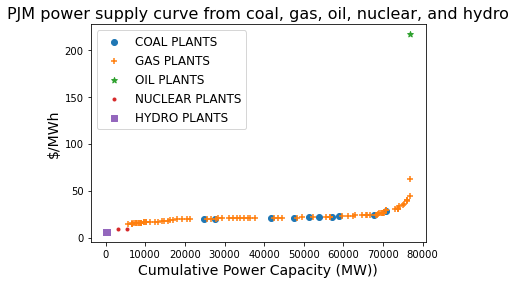

In [40]:
plt.scatter(coalSorted["CUMCAP"],coalSorted["MARGCOST"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted["CUMCAP"],gasSorted["MARGCOST"],marker="+",label="GAS PLANTS")
plt.scatter(oilSorted["CUMCAP"],oilSorted["MARGCOST"],marker="*",label="OIL PLANTS")
plt.scatter(nuclearSorted["CUMCAP"],nuclearSorted["MARGCOST"],marker=".",label="NUCLEAR PLANTS")
plt.scatter(hydroSorted["CUMCAP"],hydroSorted["MARGCOST"],marker="s",label="HYDRO PLANTS")
plt.title("PJM power supply curve from coal, gas, oil, nuclear, and hydro",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()


In [41]:
#Let's remove the last five plants in the merit order so we can see the distribution of prices more clearly without these outliers
print("there are a total of ", len(ercotSubSorted),"plants")

there are a total of  102 plants


In [42]:
ercotSubSorted=ercotSubSorted.iloc[0:len(ercotSubSorted)-5]

In [43]:
coalSorted=ercotSubSorted[ercotSubSorted["PLFUELCT"]=="COAL"]
gasSorted=ercotSubSorted[ercotSubSorted["PLFUELCT"]=="GAS"]
nuclearSorted=ercotSubSorted[ercotSubSorted["PLFUELCT"]=="NUCLEAR"]
oilSorted=ercotSubSorted[ercotSubSorted["PLFUELCT"]=="OIL"]
hydroSorted=ercotSubSorted[ercotSubSorted["PLFUELCT"]=="HYDRO"]

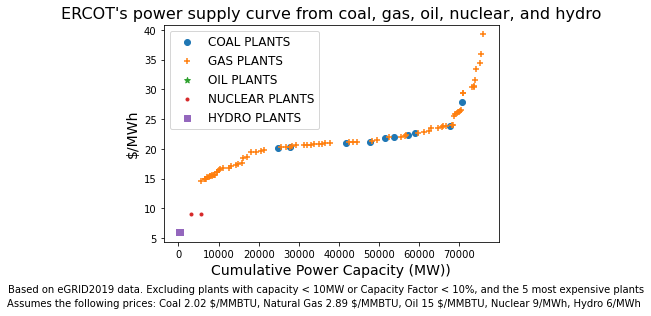

In [53]:
plt.scatter(coalSorted["CUMCAP"],coalSorted["MARGCOST"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted["CUMCAP"],gasSorted["MARGCOST"],marker="+",label="GAS PLANTS")
plt.scatter(oilSorted["CUMCAP"],oilSorted["MARGCOST"],marker="*",label="OIL PLANTS")
plt.scatter(nuclearSorted["CUMCAP"],nuclearSorted["MARGCOST"],marker=".",label="NUCLEAR PLANTS")
plt.scatter(hydroSorted["CUMCAP"],hydroSorted["MARGCOST"],marker="s",label="HYDRO PLANTS")
plt.title("ERCOT's power supply curve from coal, gas, oil, nuclear, and hydro",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
#Make sure to add a caption that makes this plot a stand-alone piece of information
txt="Based on eGRID2019 data. Excluding plants with capacity < 10MW or Capacity Factor < 10%, and the 5 most expensive plants"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
txt2="Assumes the following prices: Coal 2.02 $/MMBTU, Natural Gas 2.89 $/MMBTU, Oil 15 $/MMBTU, Nuclear 9/MWh, Hydro 6/MWh "
plt.figtext(0.5, -0.1, txt2, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()